# Univariate Linear Regression on the Scikit-Learn Diabetes Dataset
# Henry Ezeanowi
# Student Id - 8900446

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Loading Data from Scikit Learn
## Diabetes dataset

In [55]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) 

In [56]:
diabetes_y_view = pd.DataFrame(diabetes_y)
diabetes_y_view.columns = ["y"]
diabetes_y_view

,y
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [57]:
diabetes_bmi = diabetes_X[:,2].reshape((-1,1))
diabetes_bmi_view = pd.DataFrame(diabetes_bmi)
diabetes_bmi_view.columns = ["bmi"]
diabetes_bmi_view

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


# Splitting data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_bmi, diabetes_y, test_size=0.2, random_state=0)
X_y_trainview = pd.DataFrame({'train bmi': X_train.flatten(), 'train dis_prog': y_train})
X_y_trainview.columns = ["Training Data Bmi","Training Data dis_prog"]
X_y_trainview

,Training Data Bmi,Training Data dis_prog
0,0.002417,85.0
1,-0.077342,137.0
2,-0.035307,53.0
3,0.001339,51.0
4,0.020739,197.0
...,...,...
348,-0.007284,248.0
349,-0.030996,91.0
350,-0.021295,281.0
351,-0.073030,142.0


In [59]:
X_y_testview = pd.DataFrame({'Test bmi': X_test.flatten(), 'Test dis_prog': y_test})
X_y_testview.columns = ["Testing Data Bmi","Testing Data dis_prog"]
X_y_testview

,Testing Data Bmi,Testing Data dis_prog
0,0.104809,321.0
1,0.060618,215.0
2,0.008883,127.0
3,-0.023451,64.0
4,0.045529,175.0
...,...,...
84,-0.089197,104.0
85,-0.070875,49.0
86,0.043373,103.0
87,0.014272,142.0


# Linear regression

In [60]:
# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

# Linear regression coef_ and intercept_ values

In [61]:
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [981.65543614]
Intercept: 
 152.28824927379569


In [62]:
# Make predictions using the testing set
y_pred =  model.predict(X_test)
y_predview = pd.DataFrame({'dis_prog': y_pred.flatten()})
y_predview.columns = ["Predicated Data dis_prog"]
y_predview

,Predicated Data dis_prog
0,255.174269
1,211.794626
2,161.008702
3,129.267499
4,196.982065
...,...
84,64.727054
85,82.713736
86,194.865984
87,166.298902


# Train data

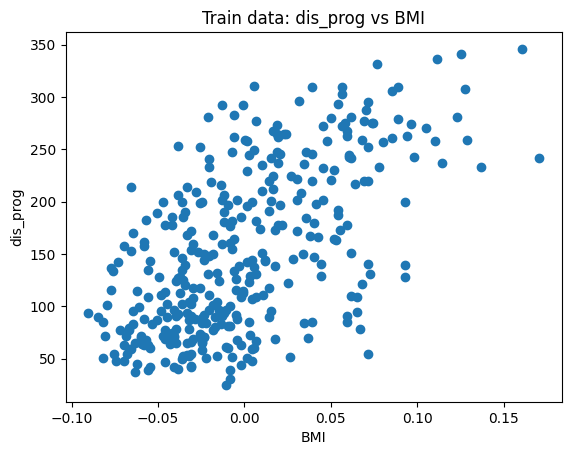

In [63]:
# Plot outputs
plt.title("Train data: dis_prog vs BMI")
plt.xlabel("BMI")
plt.ylabel("dis_prog")
plt.scatter(X_train, y_train)
plt.show()

# Test data: dis_prog vs BMI


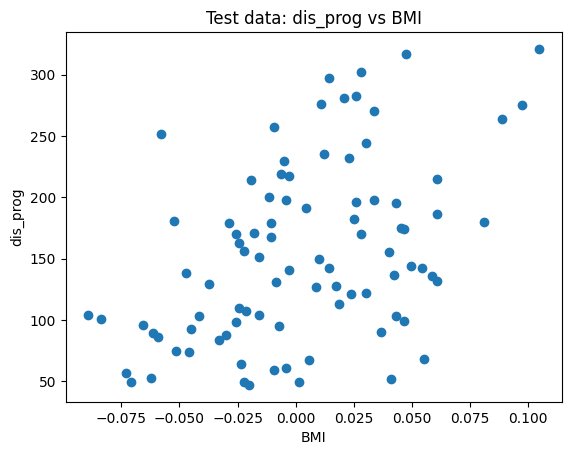

In [64]:
plt.title("Test data: dis_prog vs BMI")
plt.xlabel("BMI")
plt.ylabel("dis_prog")
plt.scatter(X_test, y_test)
plt.show()

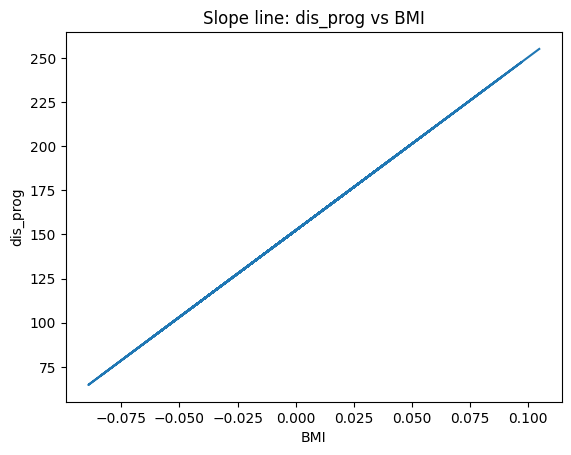

In [65]:
plt.title("Slope line: dis_prog vs BMI")
plt.xlabel("BMI")
plt.ylabel("dis_prog")
plt.plot(X_test, y_pred)
plt.show()

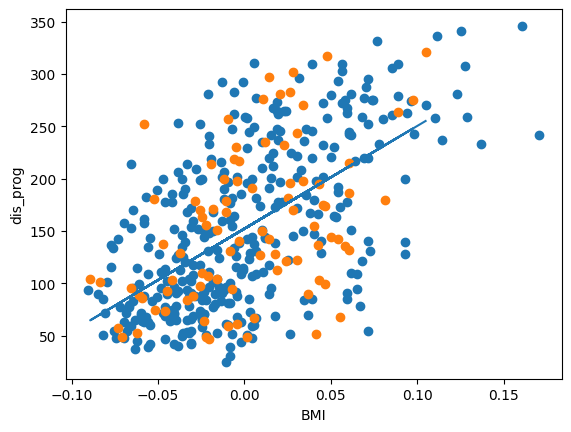

In [66]:
plt.xlabel("BMI")
plt.ylabel("dis_prog")
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Testing Data")
plt.plot(X_test, y_pred, label="Predicated")
plt.show()

# Loss of Train Data


In [67]:
y_train_pred = model.predict(X_train)
print(mean_squared_error(y_train, y_train_pred))

3827.8186984113813


# Loss of Test Data


In [68]:
print(mean_squared_error(y_test, y_pred))

4150.6801893299835


The model does not fit the data sets because the MSE is high.